In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/ECommerce_consumer behaviour.csv"
data = pd.read_csv(file_path)
data_frame = data.copy()

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
data_frame['days_since_prior_order'] = data_frame['days_since_prior_order'].fillna(0).astype(np.int64)

In [ ]:
data_frame.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [ ]:
data_frame.dropna(subset="days_since_prior_order", inplace=True)
data_frame.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [ ]:
print("\nNumber of duplicate rows:", data_frame.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
# Transform 'reordered' column to ensure it is binary (0 or 1)
if 'reordered' in data_frame.columns:
    data_frame['reordered'] = data_frame['reordered'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
print(data_frame.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                       0          17                  1          0   
1                       0          91                  2          0   
2                       0          36                  3          0   
3                       0          83                  4          0   
4                       0          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eggs     soy lactosefree  
2          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("\nBasic Statistics:")
print(data_frame.describe())


Basic Statistics:
           order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            2.019501e+06  2.019501e+06   
mean        1.343948e+01            1.068499e+01  7.120590e+01   
std         4.241008e+00            9.111204e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  3.100000e+01   

<ipython-input-10-3cb7d5fb6290>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=data_frame, palette='viridis')


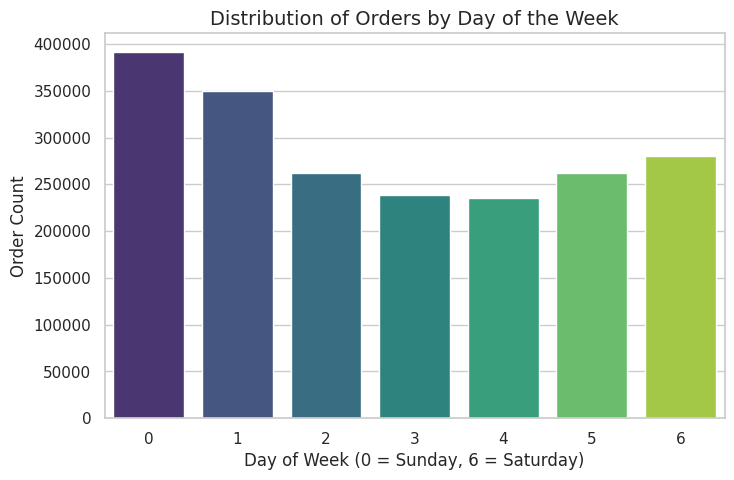

In [ ]:
# Distribution of Orders by Day of Week
plt.figure(figsize=(8, 5))
sns.countplot(x='order_dow', data=data_frame, palette='viridis')
plt.title("Distribution of Orders by Day of the Week", fontsize=14)
plt.xlabel("Day of Week (0 = Sunday, 6 = Saturday)", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()

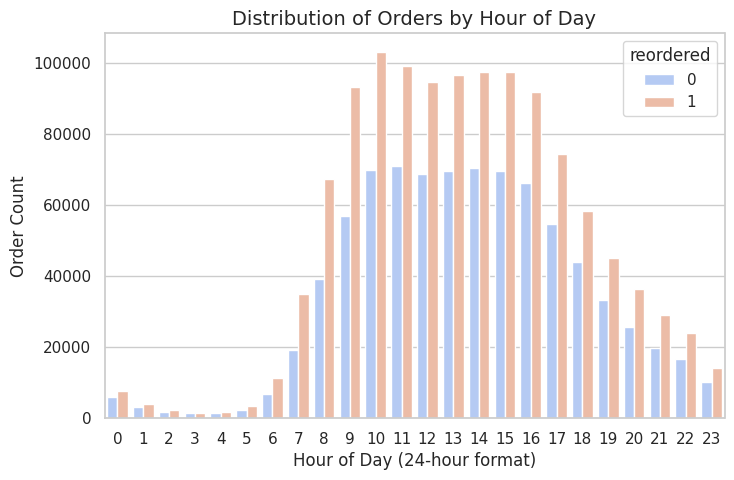

In [ ]:
# Distribution of Orders by Hour of Day
plt.figure(figsize=(8, 5))
sns.countplot(x='order_hour_of_day', data=data_frame, palette='coolwarm',hue='reordered')
plt.title("Distribution of Orders by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24-hour format)", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()

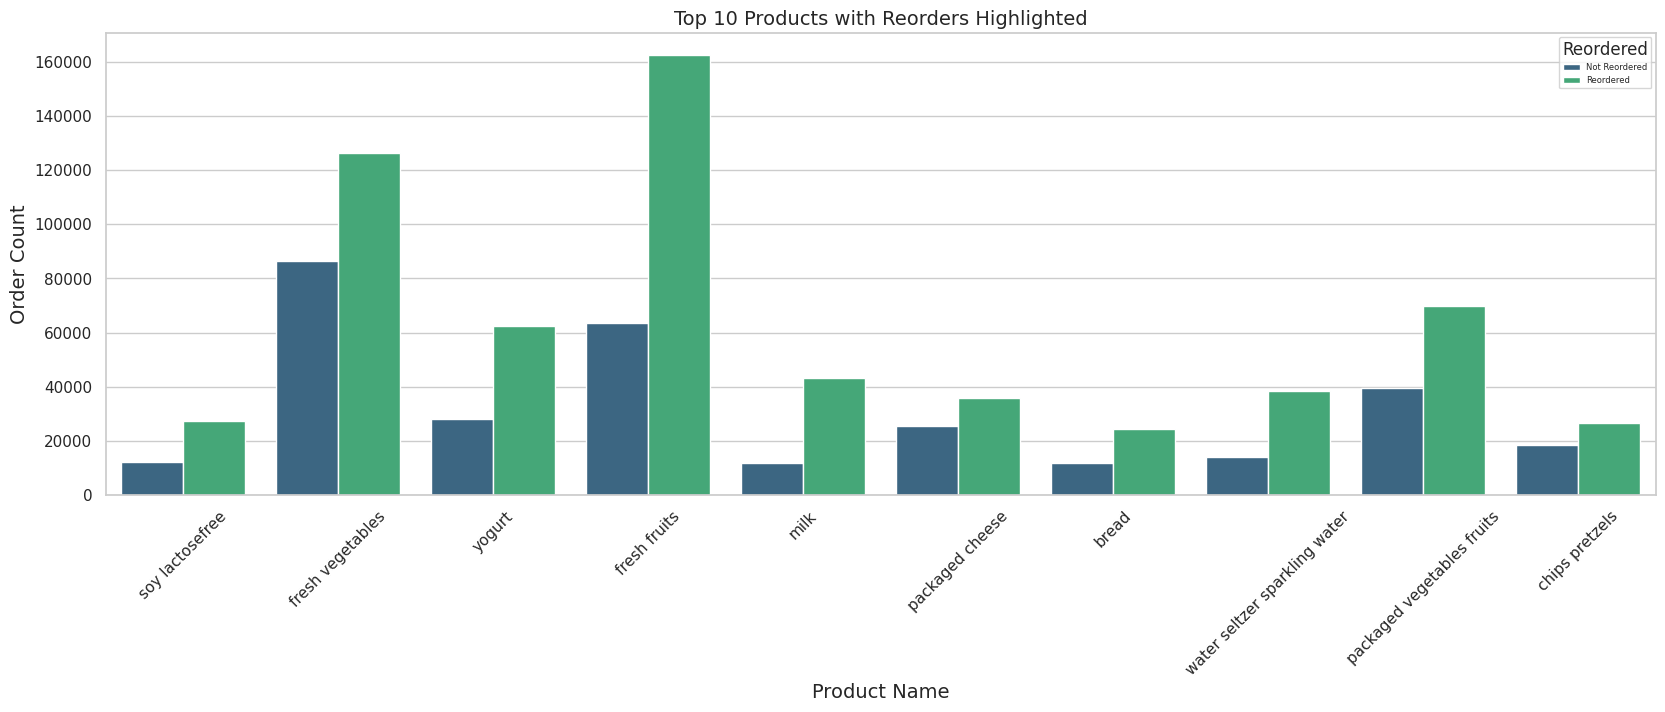

In [ ]:
top_products = data_frame['product_id'].value_counts().head(10).index
top_products_data = data_frame[data_frame['product_id'].isin(top_products)]

plt.figure(figsize=(20, 6))
sns.countplot(x='product_name', data=top_products_data, hue='reordered', palette='viridis')
plt.title("Top 10 Products with Reorders Highlighted", fontsize=14)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Order Count", fontsize=14)
plt.legend(title="Reordered", labels=["Not Reordered", "Reordered"],fontsize=6)
plt.xticks(rotation=45)
plt.show()


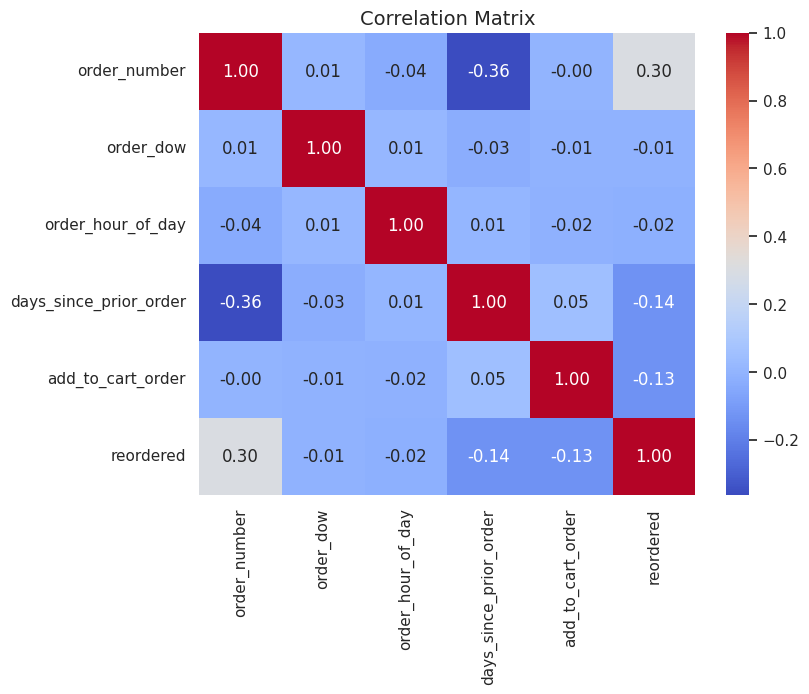

In [ ]:
numeric_cols = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
product_id_to_name = dict(zip(data_frame['product_id'].unique(), data_frame['product_name'].unique()))

# Print the dictionary
print("Unique Product IDs and Names:", product_id_to_name)


Unique Product IDs and Names: {17: 'baking ingredients', 91: 'soy lactosefree', 36: 'butter', 83: 'fresh vegetables', 120: 'yogurt', 59: 'canned meals beans', 35: 'poultry counter', 37: 'ice cream ice', 24: 'fresh fruits', 84: 'milk', 21: 'packaged cheese', 112: 'bread', 94: 'tea', 8: 'bakery desserts', 52: 'frozen breakfast', 121: 'cereal', 86: 'eggs', 43: 'buns rolls', 53: 'cream', 115: 'water seltzer sparkling water', 110: 'pickled goods olives', 49: 'packaged poultry', 108: 'other creams cheeses', 29: 'honeys syrups nectars', 26: 'coffee', 31: 'refrigerated', 3: 'energy granola bars', 77: 'soft drinks', 30: 'latino foods', 111: 'plates bowls cups flatware', 54: 'paper goods', 20: 'oral hygiene', 56: 'diapers wipes', 85: 'food storage', 117: 'nuts seeds dried fruit', 25: 'soap', 123: 'packaged vegetables fruits', 106: 'hot dogs bacon sausage', 96: 'lunch meat', 107: 'chips pretzels', 122: 'meat counter', 67: 'fresh dips tapenades', 1: 'prepared soups salads', 72: 'condiments', 98: '

In [ ]:
data_frame.to_csv('e_commerce_data_Cleaned.csv', index=False)